<a href="https://colab.research.google.com/github/mohaktiwari/Machine-Learning-Projects/blob/main/CatsvsDogs(TransferLearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:09<00:00, 288MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [6]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [8]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
conv_base.trainable = False

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16845121 (64.26 MB)
Trainable params: 2130433 (8.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit_generator(
        train_generator,
        epochs=15,
        validation_data=validation_generator)

<ipython-input-13-ab39e4412674>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
625/625 [==============================] - 173s 264ms/step - loss: 0.3007 - accuracy: 0.8690 - val_loss: 0.2288 - val_accuracy: 0.9038
Epoch 2/15
625/625 [==============================] - 154s 246ms/step - loss: 0.2403 - accuracy: 0.8974 - val_loss: 0.2037 - val_accuracy: 0.9126
Epoch 3/15
625/625 [==============================] - 152s 243ms/step - loss: 0.2234 - accuracy: 0.9050 - val_loss: 0.2104 - val_accuracy: 0.9078
Epoch 4/15
625/625 [==============================] - 153s 244ms/step - loss: 0.2113 - accuracy: 0.9085 - val_loss: 0.1951 - val_accuracy: 0.9156
Epoch 5/15
625/625 [==============================] - 153s 245ms/step - loss: 0.2006 - accuracy: 0.9126 - val_loss: 0.1902 - val_accuracy: 0.9158
Epoch 6/15
625/625 [==============================] - 152s 243ms/step - loss: 0.1946 - accuracy: 0.9190 - val_loss: 0.2087 - val_accuracy: 0.9162
Epoch 7/15
625/625 [==============================] - 151s 242ms/step - loss: 0.1903 - accuracy: 0.9211 - val_loss: 0.2102 -

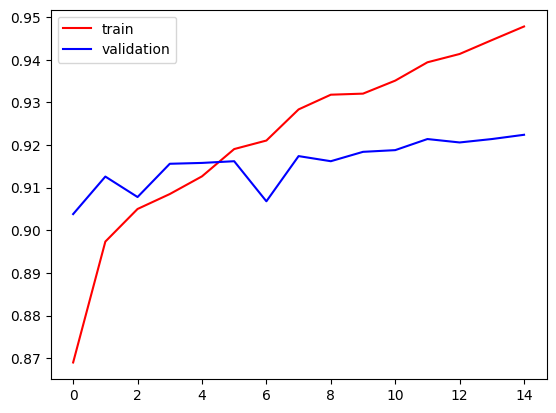

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

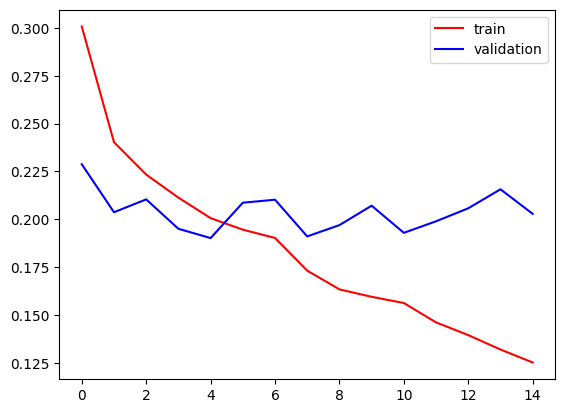

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
model.evaluate(train_generator)

625/625 [==============================] - 147s 234ms/step - loss: 0.1066 - accuracy: 0.9564


[0.10663266479969025, 0.9563500285148621]

In [17]:
import cv2

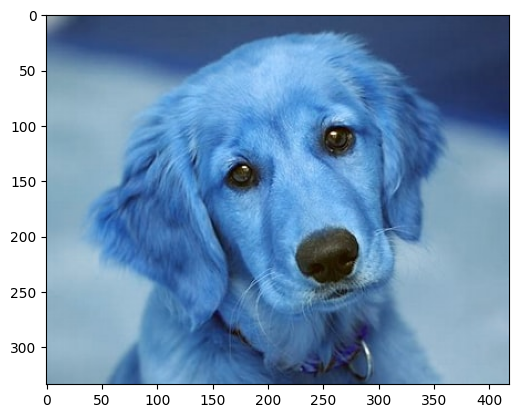

In [25]:
img=cv2.imread('/content/dog1.jpeg')
plt.imshow(img)

In [26]:
img.shape

(334, 418, 3)

In [27]:
img=cv2.resize(img,(150,150))

In [28]:
img_input=img.reshape(1,150,150,3)

In [29]:
classify=model.predict(img_input)
if classify==1:
  print('dog')
else:
  print('cat')

1/1 [==============================] - 0s 18ms/step
dog
